# Problem Statement

A US-based housing company named Surprise Housing wants to enter the Australian market and use data analytics to purchase houses at a price below their actual values and sell them at a higher price. They have collected a dataset of house sale data in Australia and want to build a regression model using regularization techniques like ridge and lasso regression. The goal is to predict the actual value of prospective properties and determine which variables are significant in predicting house prices. Additionally, the company aims to determine the optimal value of lambda (regularization parameter) for both ridge and lasso regression models.

# Business Goal
The main objective of this assignment is to model the price of houses using available independent variables. The resulting regression model will enable the management of Surprise Housing to understand how house prices vary with different variables. By gaining insights into the pricing dynamics of the Australian market, the company can strategically focus on areas that offer high returns. The model will serve as a valuable tool for the management to make informed decisions and optimize their investment strategy in the new market.

# Import the necessary libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For importing in Google collab
import io

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Load the data:

In [ ]:
# Read the data from csv file
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

#looking at dataset head
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Checking shape of dataset
df.shape

(1460, 81)

In [ ]:
# Describing the columns of dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Checking dataset for null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Preprocess the data:

## Handle missing values, if any, by either imputing them or removing the corresponding rows/columns.

In [ ]:
# Checking for null and missing values in columns
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

In [ ]:
# Checking for null and missing values in rows
round((df.isnull().sum(axis=1)/len(df))*100,2).sort_values(ascending=False)


39      1.03
1011    1.03
1218    1.03
533     1.03
1179    0.96
        ... 
890     0.14
1387    0.14
1076    0.14
1386    0.07
1328    0.07
Length: 1460, dtype: float64

In [ ]:
# Making copy of dataset to compare
dup_df = df.copy()

# Looking for duplicates and, if found, removing the entire duplicate row
dup_df.drop_duplicates(subset=None, inplace=True)

In [ ]:
dup_df.shape

(1460, 81)

In [ ]:
# Based on a threshold of 10%, any columns that exceed this threshold will be dropped from the dataset.

round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [ ]:
df = df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')


In [ ]:
# Checking the columns where the missing values between 0-10%
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values>0.00]


MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

**Before proceeding, we will convert the "Year" columns into their corresponding ages. To achieve this, we will fill these columns with numerical values. By querying the maximum year across all these columns, which happens to be 2010, we can calculate the age by subtracting the original year value from 2010. For example, if the YearBuilt is 2000, then the YearBuiltOld will be 2010 - 2000 = 10.**

In [ ]:
df['YearBuilt_Old'] = df.YearBuilt.max()-df.YearBuilt
df['YearRemodAdd_Old'] = df.YearRemodAdd.max()-df.YearRemodAdd
df['GarageYrBlt_Old'] = df.GarageYrBlt.max()-df.GarageYrBlt
df['YrSold_Old'] = df.YrSold.max()-df.YrSold
df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
892,1963,2003,1963.0,2006,47,7,47.0,4
547,1970,1970,1987.0,2007,40,40,23.0,3
470,1985,1985,1985.0,2010,25,25,25.0,0
848,1908,1997,1908.0,2008,102,13,102.0,2
1379,2006,2007,2007.0,2008,4,3,3.0,2
156,1950,1950,1950.0,2006,60,60,60.0,4
887,1955,1955,1955.0,2008,55,55,55.0,2
884,1967,1967,1967.0,2009,43,43,43.0,1
157,2009,2010,2009.0,2010,1,0,1.0,0
1389,1941,1950,2003.0,2007,69,60,7.0,3


**Now, we will drop the original "Year" columns since we have already derived the corresponding ages and stored them in new columns.**

In [ ]:
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')


**We will impute the missing values in the "GarageYrBlt_Old" column with -1 to indicate that these houses do not have a garage.**

In [ ]:
df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageYrBlt_Old.fillna(-1,inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)

**Based on the analysis, we have determined that the "Street" and "Utilities" columns have the lowest variance and do not significantly contribute to predicting the house prices. Therefore, we will drop these columns from the dataset.**

In [ ]:
df.Street.value_counts()
df.Utilities.value_counts()
df = df.drop(['Street','Utilities'],axis='columns')

**Based on our analysis, we have found that the 'Id' column does not provide any useful information for predicting house prices. Therefore, we will drop the 'Id' column from our dataset as it is not relevant to our analysis.**

In [ ]:
df = df.drop('Id',axis='columns')


In [ ]:
df[list(df.dtypes[df.dtypes!='object'].index)].describe()


,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


# Feature selection:

## Perform exploratory data analysis (EDA) to gain insights into the relationships between the independent variables and the target variable.

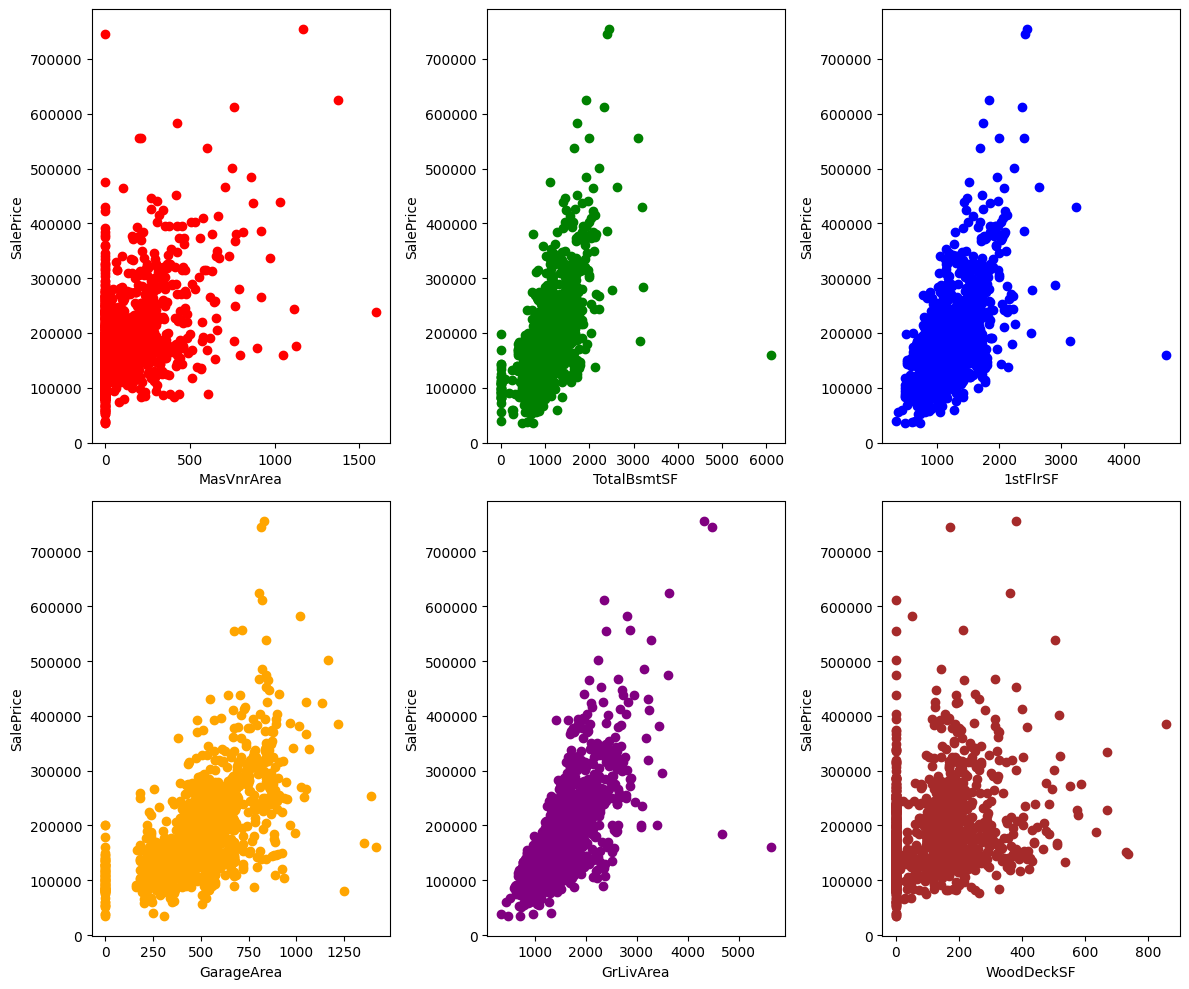

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.scatter(df.MasVnrArea, df.SalePrice, color='red')
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')

plt.subplot(2, 3, 2)
plt.scatter(df.TotalBsmtSF, df.SalePrice, color='green')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

plt.subplot(2, 3, 3)
plt.scatter(df['1stFlrSF'], df.SalePrice, color='blue')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

plt.subplot(2, 3, 4)
plt.scatter(df['GarageArea'], df.SalePrice, color='orange')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

plt.subplot(2, 3, 5)
plt.scatter(df['GrLivArea'], df.SalePrice, color='purple')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.subplot(2, 3, 6)
plt.scatter(df['WoodDeckSF'], df.SalePrice, color='brown')
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


## Use correlation analysis or feature importance techniques to identify the significant variables that strongly affect the price of houses.

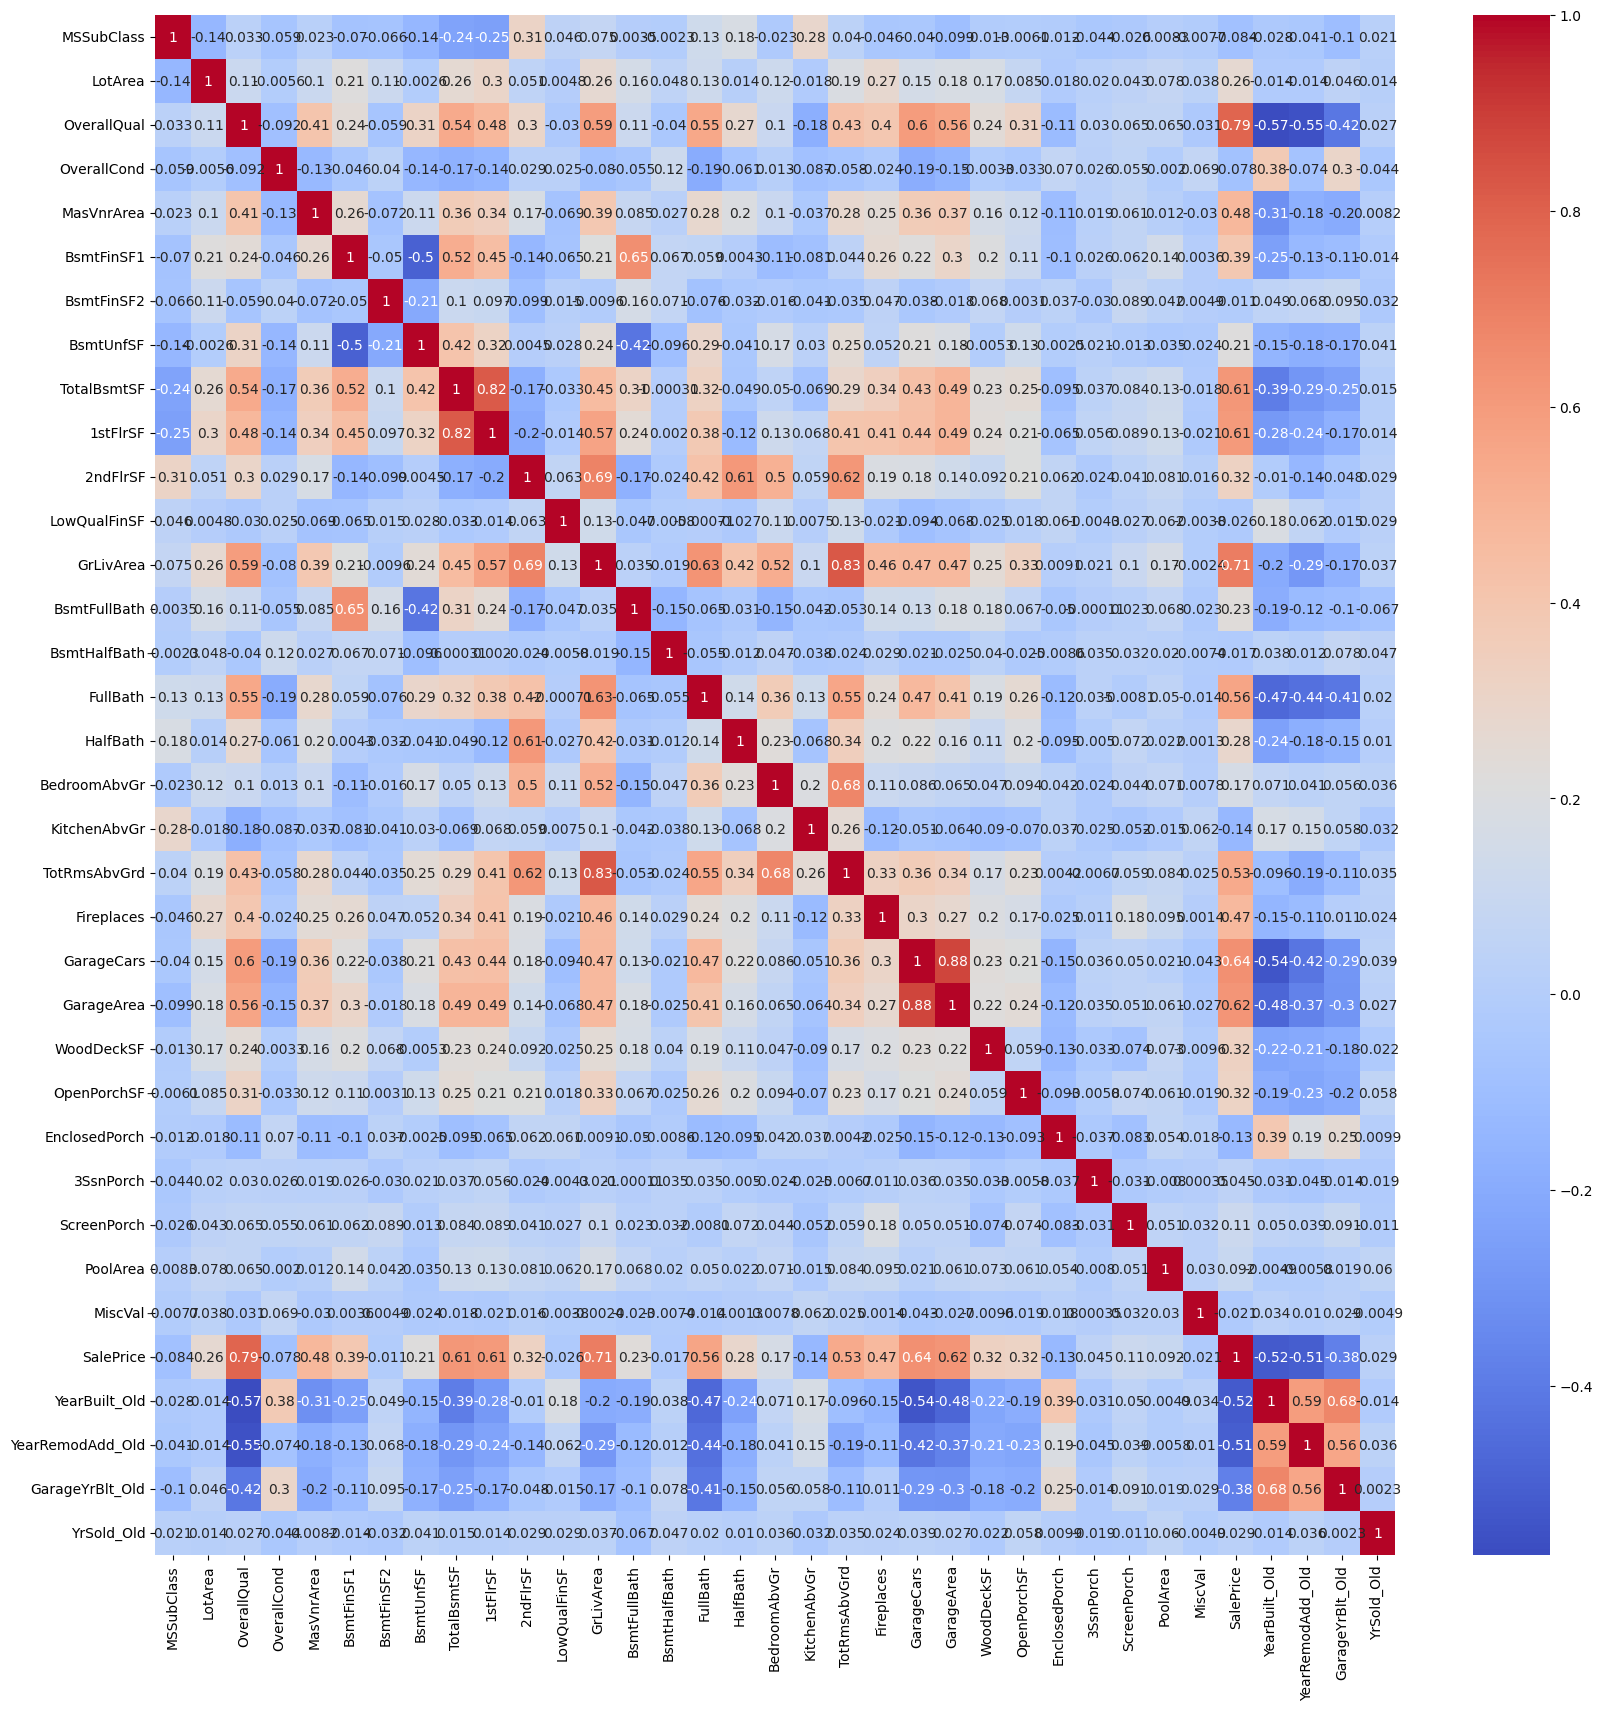

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[list(df.dtypes[df.dtypes != 'object'].index)].corr(), annot=True, cmap='coolwarm')
plt.show()


## Handling Outliers

In [ ]:
df.shape

(1460, 71)

In [ ]:
num_cols = list(df.dtypes[df.dtypes !='object'].index)
num_cols = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_cols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))]
    return x

df = drop_outliers(df)

In [ ]:
df.shape

(1441, 71)

**Let's examine the following columns. It is evident that these columns exhibit some form of order, indicating that they are of ordinal nature.**

In [ ]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [ ]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

**Let's explore the converted columns to gain a better understanding of their values and how they relate to our analysis.**

In [ ]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


**We will create dummy variables for the categorical columns in our dataset and then join them with the original dataset. This will allow us to represent categorical variables as binary indicators, which can be used in our analysis.**

In [ ]:
dummy_cols = pd.get_dummies(df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

df = pd.concat([df,dummy_cols],axis='columns')

df = df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

**Let's examine the distribution of our target variable before applying scaling and performing the data split. This will give us insights into the overall distribution and help us understand any potential skewness or outliers in the target variable.**

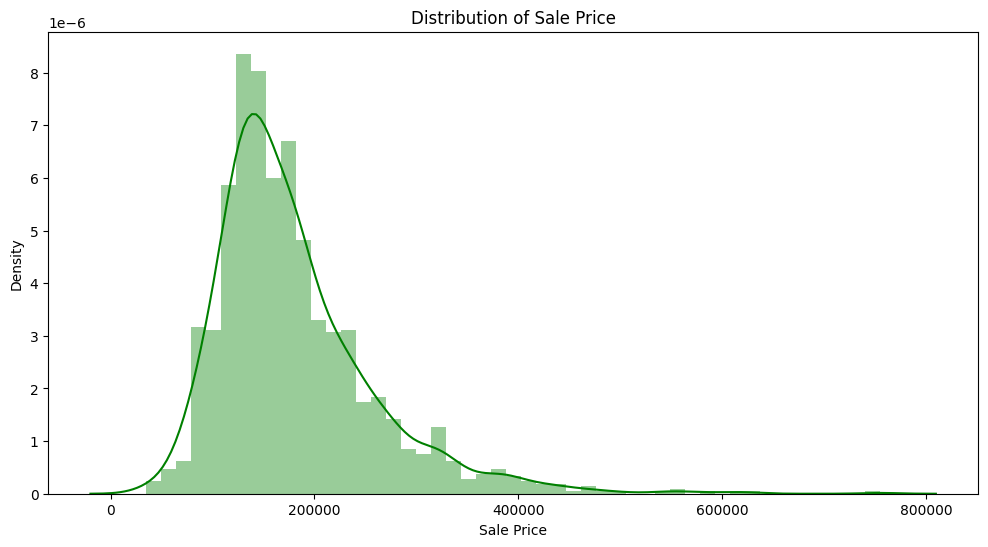

In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(df['SalePrice'], color='green')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.show()


# Split the data into training and testing sets:

### Divide the data into two parts: a training set and a testing set.


In [ ]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=33)


In [ ]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


### Scaling the train dataset

To ensure consistency in scale and improve model performance, we will scale the training dataset. This includes scaling the dependent variable, SalePrice, as its scale differs significantly from the independent variables.

In [ ]:
num_cols = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

**Let's examine the distribution of the variables again after scaling.**






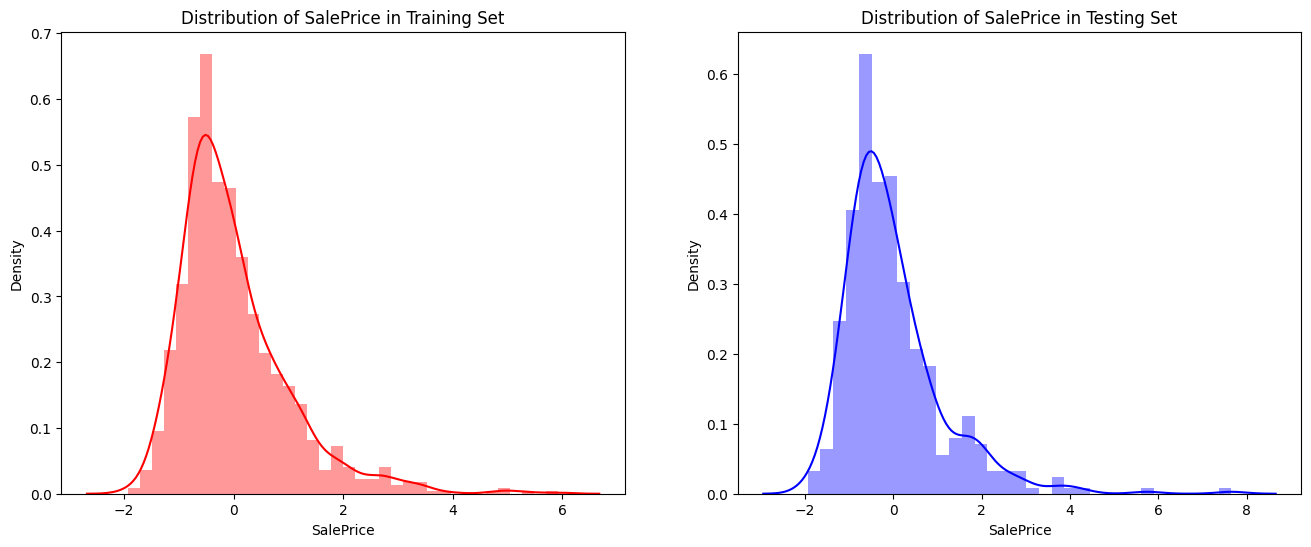

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice, color='red')
plt.title('Distribution of SalePrice in Training Set')
plt.subplot(122)
sns.distplot(df_test.SalePrice, color='blue')
plt.title('Distribution of SalePrice in Testing Set')
plt.show()

**Splitting the dataset into the dependent variable (target variable) and the independent variables.**

In [ ]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [ ]:
y_test = df_test.pop('SalePrice')
X_test = df_test

**Now, we will use Recursive Feature Elimination (RFE) to find the optimal number of features. Since using RFE with GridSearchCV would result in a large number of fits and significantly increase the runtime, we will use RFE directly in this case.**

In [ ]:
len(X_train.columns)


192

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=70)
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=70)

In [ ]:
lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
rfe = RFE(estimator=lm, n_features_to_select=70, step=1, verbose=0)
rfe.fit(X_train, y_train)  # Fit the RFE object to the training data

rfe_scores = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
rfe_scores.columns = ['Column_Names', 'Status', 'Rank']


In [ ]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)


**Lets filter the train and test set for the RFE selected columns**

In [ ]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

# Build a lasso regression model:

In [ ]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8959009113520355
0.7981157481409148


In [ ]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.404),
 ('LotArea', 0.141),
 ('LotShape', 0.279),
 ('LandSlope', 0.166),
 ('OverallQual', 0.138),
 ('OverallCond', 0.05),
 ('MasVnrArea', 0.0),
 ('ExterQual', -0.02),
 ('ExterCond', 0.39),
 ('BsmtQual', 0.16),
 ('BsmtCond', -0.071),
 ('BsmtExposure', 0.132),
 ('BsmtFinType1', -0.122),
 ('BsmtFinSF1', -0.13),
 ('BsmtFinType2', -0.094),
 ('BsmtFinSF2', 0.284),
 ('BsmtUnfSF', -0.13),
 ('TotalBsmtSF', -0.192),
 ('HeatingQC', -0.118),
 ('CentralAir', 0.284),
 ('1stFlrSF', -0.066),
 ('2ndFlrSF', -0.046),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', -0.17),
 ('BsmtFullBath', -0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', -0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.091),
 ('KitchenQual', -0.0),
 ('TotRmsAbvGrd', -0.104),
 ('Fireplaces', 0.038),
 ('GarageFinish', 0.021),
 ('GarageCars', -0.06),
 ('GarageArea', 0.0),
 ('GarageQual', 0.031),
 ('GarageCond', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', -0.0),
 ('Sc

**Now lets try to improve our model with the optimal value of alpha using GridSearchCV**

In [ ]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.108619,0.019136,0.007478,0.004336,0.001,{'alpha': 0.001},0.871043,0.899394,0.871833,0.860353,0.887205,0.859845,0.875731,0.904435,0.887025,0.876833,0.879370,0.014275,1,0.899136,0.895230,0.898489,0.898691,0.896389,0.899835,0.895761,0.892828,0.895906,0.896655,0.896892,0.002033
1,0.034527,0.010330,0.008134,0.007617,0.010,{'alpha': 0.01},0.847959,0.881914,0.866485,0.847969,0.865698,0.840766,0.861620,0.892492,0.869377,0.861199,0.863548,0.014954,2,0.872300,0.871196,0.871228,0.873264,0.871189,0.874869,0.872324,0.867361,0.870740,0.871547,0.871602,0.001834
2,0.023710,0.007057,0.006111,0.004610,0.100,{'alpha': 0.1},0.776491,0.848681,0.799262,0.819789,0.793357,0.777658,0.829704,0.820383,0.819125,0.808582,0.809303,0.021748,3,0.816576,0.813406,0.814244,0.817009,0.815150,0.816598,0.814724,0.804656,0.815486,0.813016,0.814086,0.003393
3,0.020969,0.006753,0.008440,0.004399,1.000,{'alpha': 1.0},-0.005920,-0.000397,-0.016610,-0.000130,-0.000652,-0.005698,-0.000119,-0.013696,-0.000326,-0.011833,-0.005538,0.006042,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.028326,0.007963,0.011628,0.005013,5.000,{'alpha': 5.0},-0.005920,-0.000397,-0.016610,-0.000130,-0.000652,-0.005698,-0.000119,-0.013696,-0.000326,-0.011833,-0.005538,0.006042,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


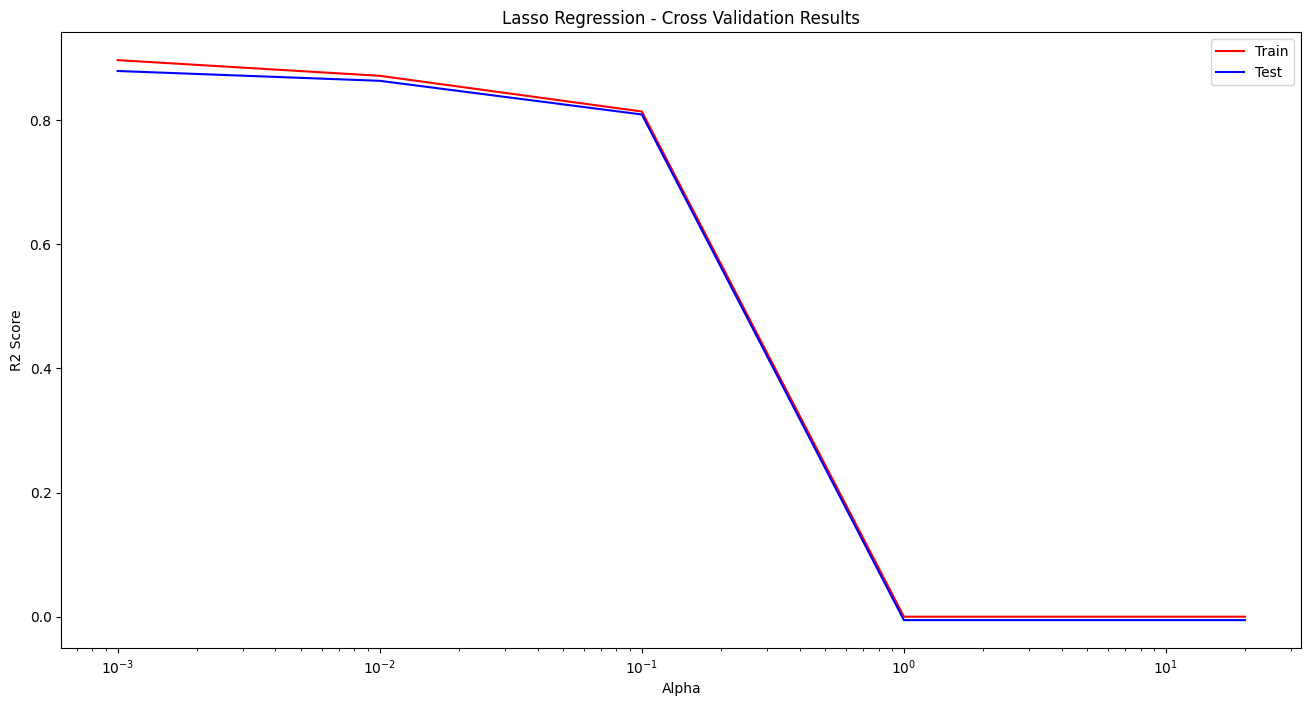

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'], color='red', label='Train')
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'], color='blue', label='Test')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.title('Lasso Regression - Cross Validation Results')
plt.legend()
plt.show()

In [ ]:
# Checking the best parameter (Alpha value)
best_alpha = model_cv.best_params_['alpha']
print("Best Alpha:", best_alpha)

Best Alpha: 0.001


In [ ]:
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

train_r2_score = r2_score(y_true=y_train, y_pred=y_train_pred)
test_r2_score = r2_score(y_true=y_test, y_pred=y_test_pred)

print("Training R^2 Score:", train_r2_score)
print("Testing R^2 Score:", test_r2_score)

Training R^2 Score: 0.8959009113520355
Testing R^2 Score: 0.7981157481409148


In [ ]:
lasso_params = list(lasso_model.coef_)
lasso_params.insert(0, lasso_model.intercept_)
columns = df_train.columns
columns = ['const'] + list(columns)
lasso_coef = pd.DataFrame(list(zip(columns, lasso_params)), columns=['Featuere', 'Coefficient'])

In [ ]:
lasso_coef_sorted = lasso_coef.sort_values(by='Coefficient', ascending=False).head(10)

# Build a ridge regression model:



In [ ]:
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, y_train)

y_train_pred_ridge = ridge_model.predict(X_train)
print("R2 score (Train):", r2_score(y_train, y_train_pred_ridge))

y_test_pred_ridge = ridge_model.predict(X_test)
print("R2 score (Test):", r2_score(y_test, y_test_pred_ridge))

R2 score (Train): 0.9034708754523424
R2 score (Test): 0.8001153243335838


As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score
Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [ ]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_result_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('float32')
cv_result_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.022506,0.003265,0.006076,0.003819,0.001,{'alpha': 0.001},0.870393,0.897083,0.856042,0.829443,0.872062,0.860474,0.886662,0.903998,0.893110,0.882394,0.875166,0.021266,10,0.906507,0.902731,0.906774,0.906983,0.904053,0.906731,0.902718,0.900615,0.902868,0.904499,0.904448,0.002111
1,0.018527,0.004657,0.004905,0.002040,0.010,{'alpha': 0.01},0.870386,0.897134,0.856252,0.830181,0.874946,0.860517,0.886687,0.904020,0.892981,0.882498,0.875560,0.021063,9,0.906506,0.902730,0.906773,0.906982,0.904049,0.906731,0.902718,0.900614,0.902868,0.904498,0.904447,0.002111
2,0.025885,0.002863,0.008298,0.004470,0.100,{'alpha': 0.1},0.870338,0.897673,0.858078,0.836379,0.887710,0.860873,0.886816,0.904238,0.892045,0.883293,0.877744,0.019883,8,0.906452,0.902672,0.906698,0.906898,0.903885,0.906691,0.902655,0.900555,0.902819,0.904423,0.904375,0.002111
3,0.021152,0.004798,0.007428,0.003510,0.200,{'alpha': 0.2},0.870323,0.898266,0.859676,0.841388,0.890861,0.861153,0.886807,0.904466,0.891506,0.883822,0.878827,0.018928,7,0.906328,0.902543,0.906533,0.906712,0.903652,0.906595,0.902520,0.900421,0.902712,0.904263,0.904228,0.002107
4,0.020404,0.005608,0.005579,0.003277,0.500,{'alpha': 0.5},0.870406,0.899738,0.862988,0.850062,0.891652,0.861607,0.886449,0.905048,0.891133,0.884425,0.880351,0.017183,5,0.905829,0.902022,0.905881,0.905988,0.903017,0.906174,0.902020,0.899881,0.902271,0.903659,0.903674,0.002083


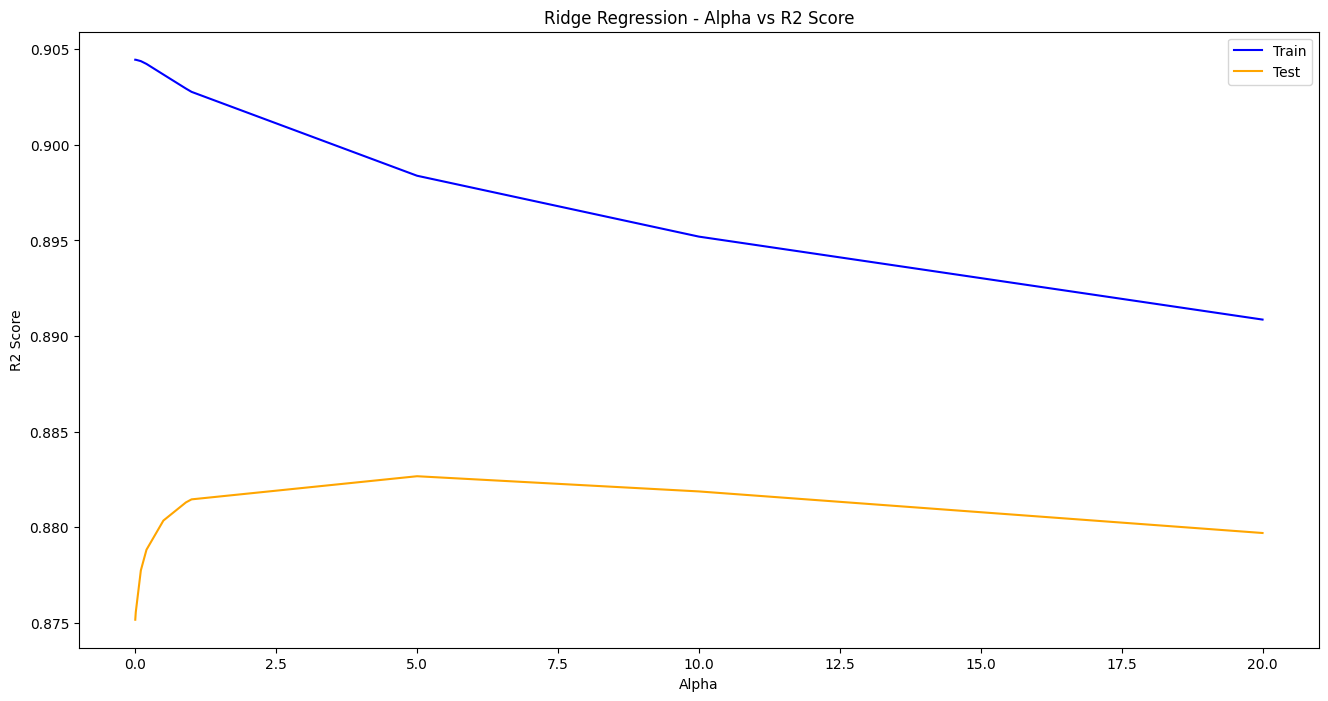

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_ridge['param_alpha'], cv_result_ridge['mean_train_score'], color='blue', label='Train')
plt.plot(cv_result_ridge['param_alpha'], cv_result_ridge['mean_test_score'], color='orange', label='Test')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('Ridge Regression - Alpha vs R2 Score')
plt.legend()
plt.show()

**On the basis of above graph lets create the model**

In [ ]:
ridge_best_alpha = model_cv.best_params_

In [ ]:
ridge_model = Ridge(alpha=0.9)
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)
train_r2_score = r2_score(y_train, y_train_pred)
print("R2 score (train):", train_r2_score)

y_test_pred = ridge_model.predict(X_test)
test_r2_score = r2_score(y_test, y_test_pred)
print("R2 score (test):", test_r2_score)

R2 score (train): 0.9021412045648732
R2 score (test): 0.8002778497978669


In [ ]:
model_parameters = list(ridge_model.coef_)
model_parameters.insert(0, ridge_model.intercept_)
columns = df_train.columns
columns.insert(0, 'constant')
ridge_coef = pd.DataFrame(list(zip(columns, model_parameters)))
ridge_coef.columns = ['Feature', 'Coefficient']

In [ ]:
ridge_coef.sort_values(by='Coefficient', ascending=False).head(10)



,Feature,Coefficient
67,Neighborhood_Gilbert,0.461013
44,MiscVal,0.416294
59,LotConfig_Inside,0.349945
19,CentralAir,0.330857
27,HalfBath,0.314587
15,BsmtFinSF2,0.310504
25,BsmtHalfBath,0.293192
68,Neighborhood_IDOTRR,0.292279
38,WoodDeckSF,0.272375
2,LotShape,0.264034


After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elemination i am goint to consider that as my final model.

# Final Model

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Train R^2 Score: 0.8959009113520355
Test R^2 Score: 0.7981157481409148


## Model Inference and Conclusion

Which variables are significant in predicting the price of a house:

- Neighborhood_Gilbert: If the house has Gilbert Neighborhood then the Price increase.
- MiscVal: $Value of miscellaneous feature
- LotConfig_Inside: If the house has lot configuration inside lot then - the Price increase.
- CentralAir: If the CentralAir is Yes the SalePrice is higher
- HalfBath: If Half baths above grade then the Price increase.

**Optimal value of alpha:**
- For Ridge regression :0.9
- For Lasso Regression :0.001